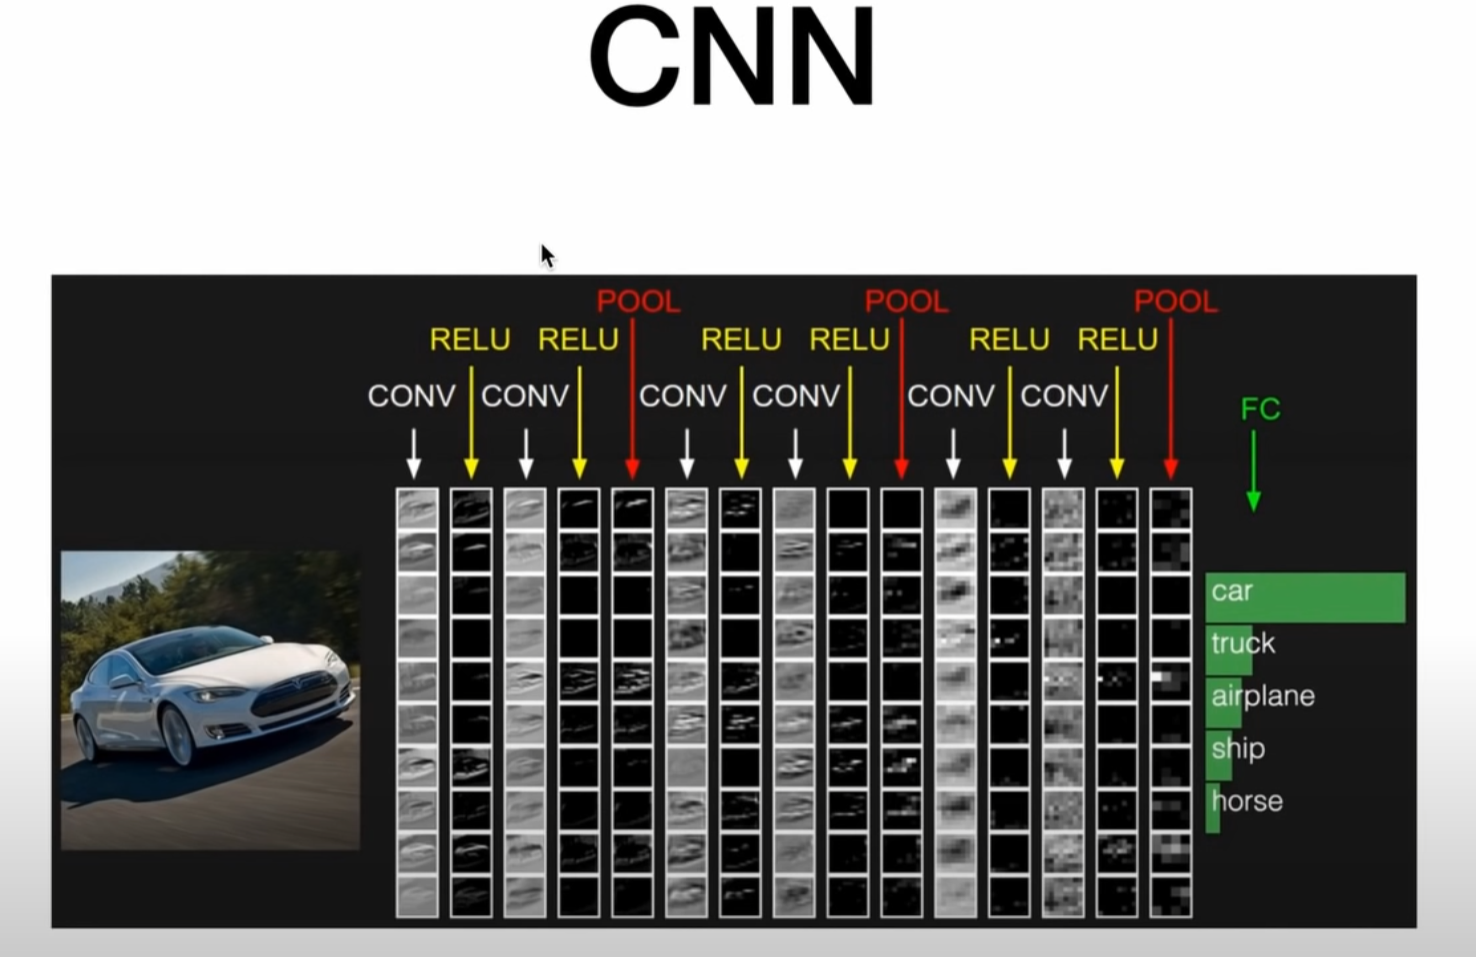

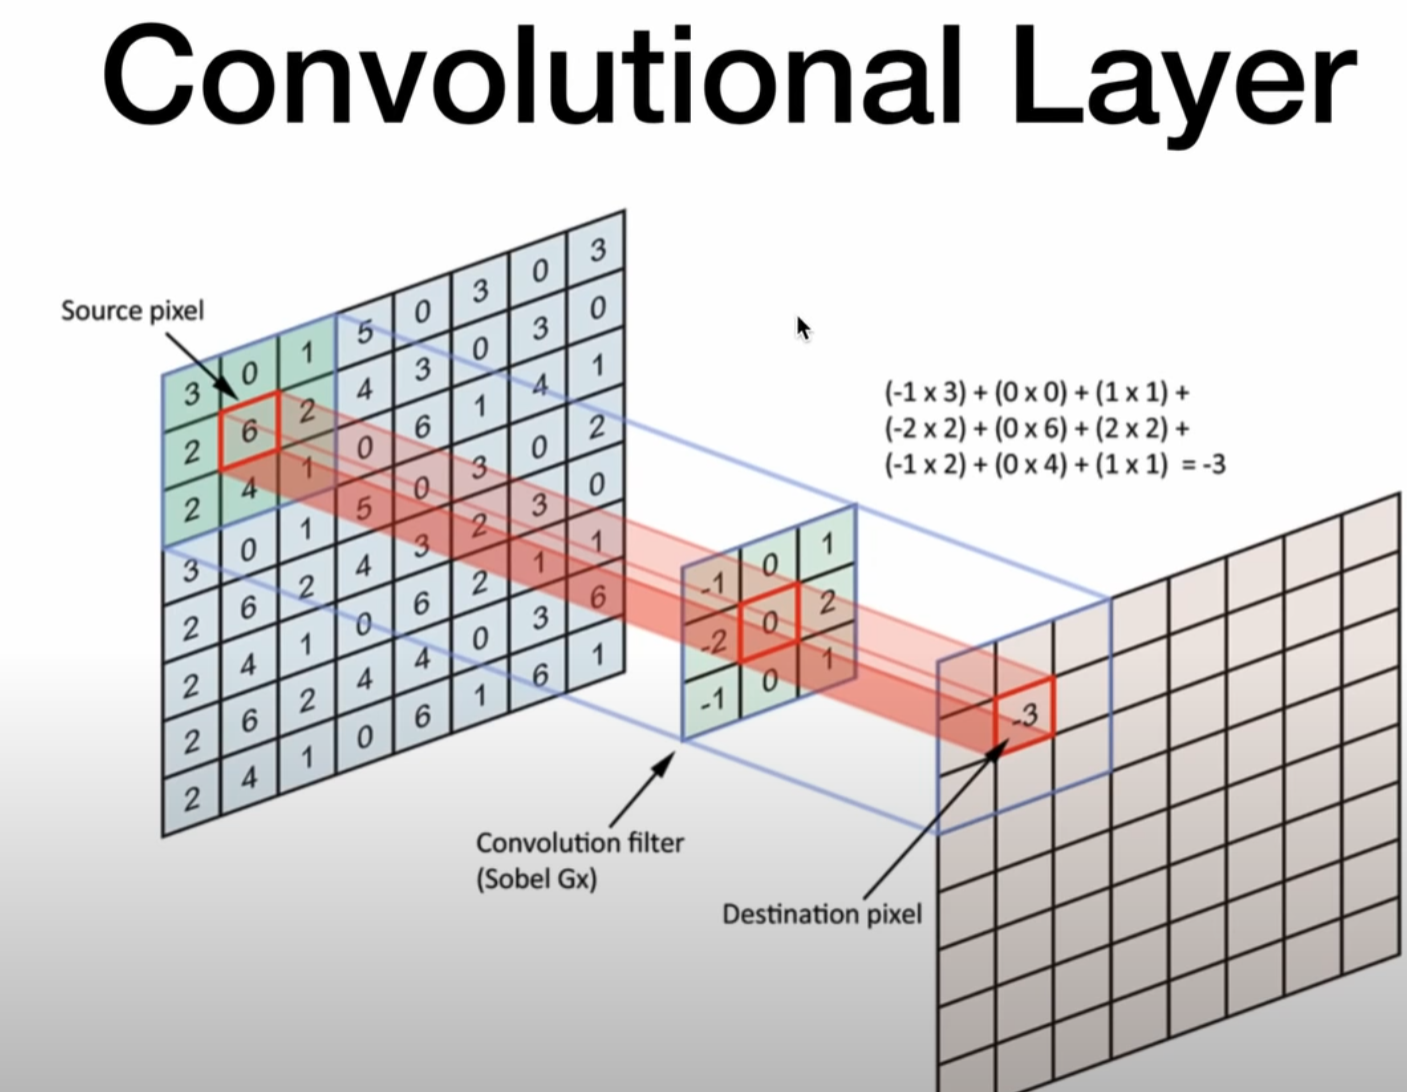

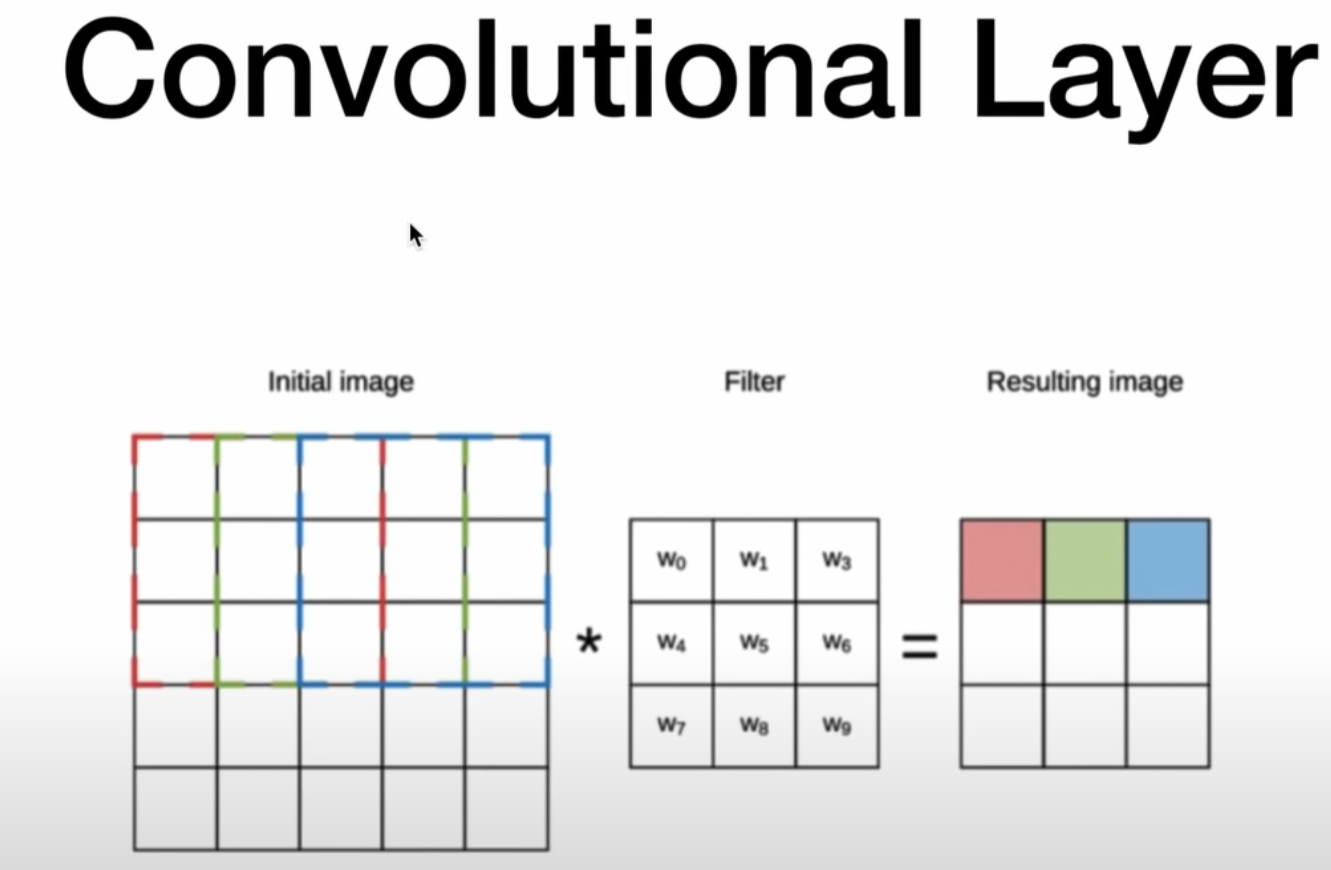

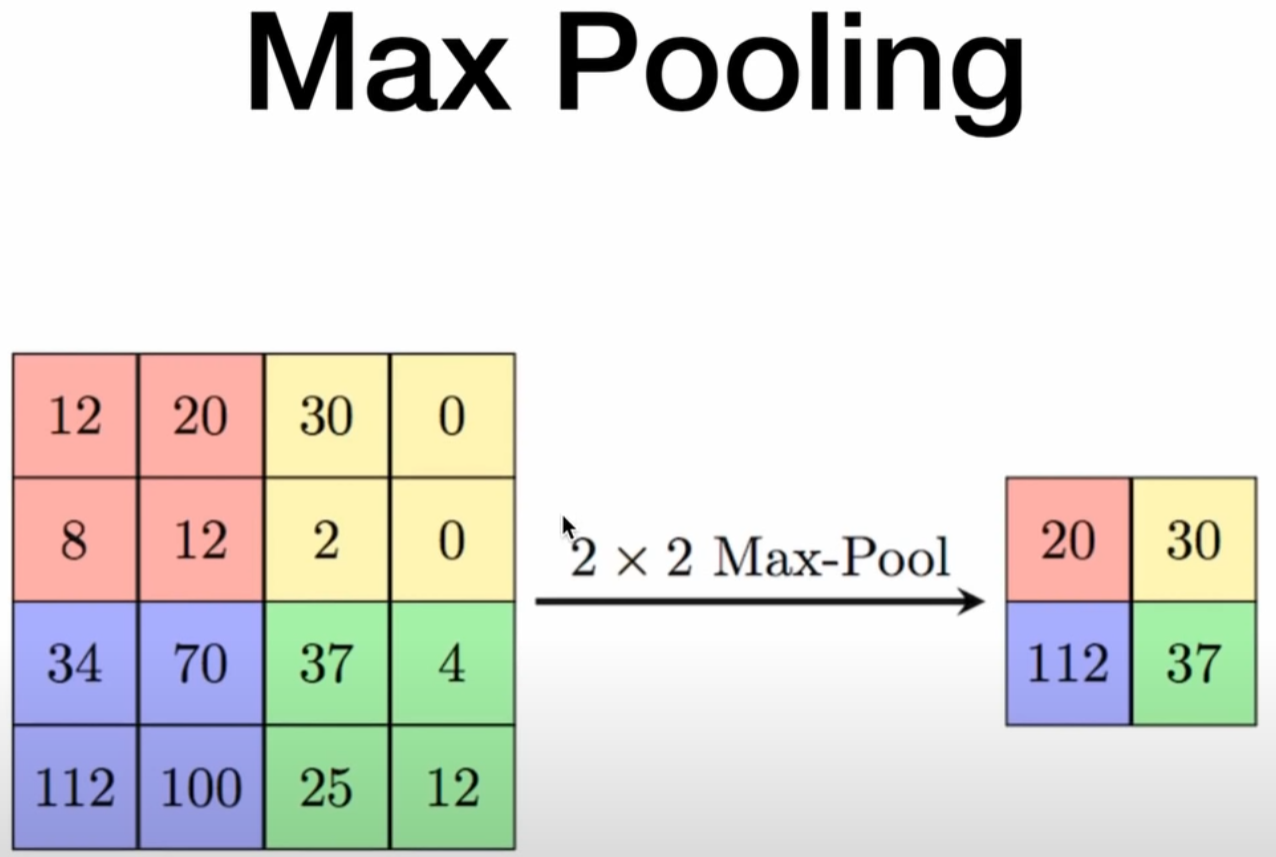

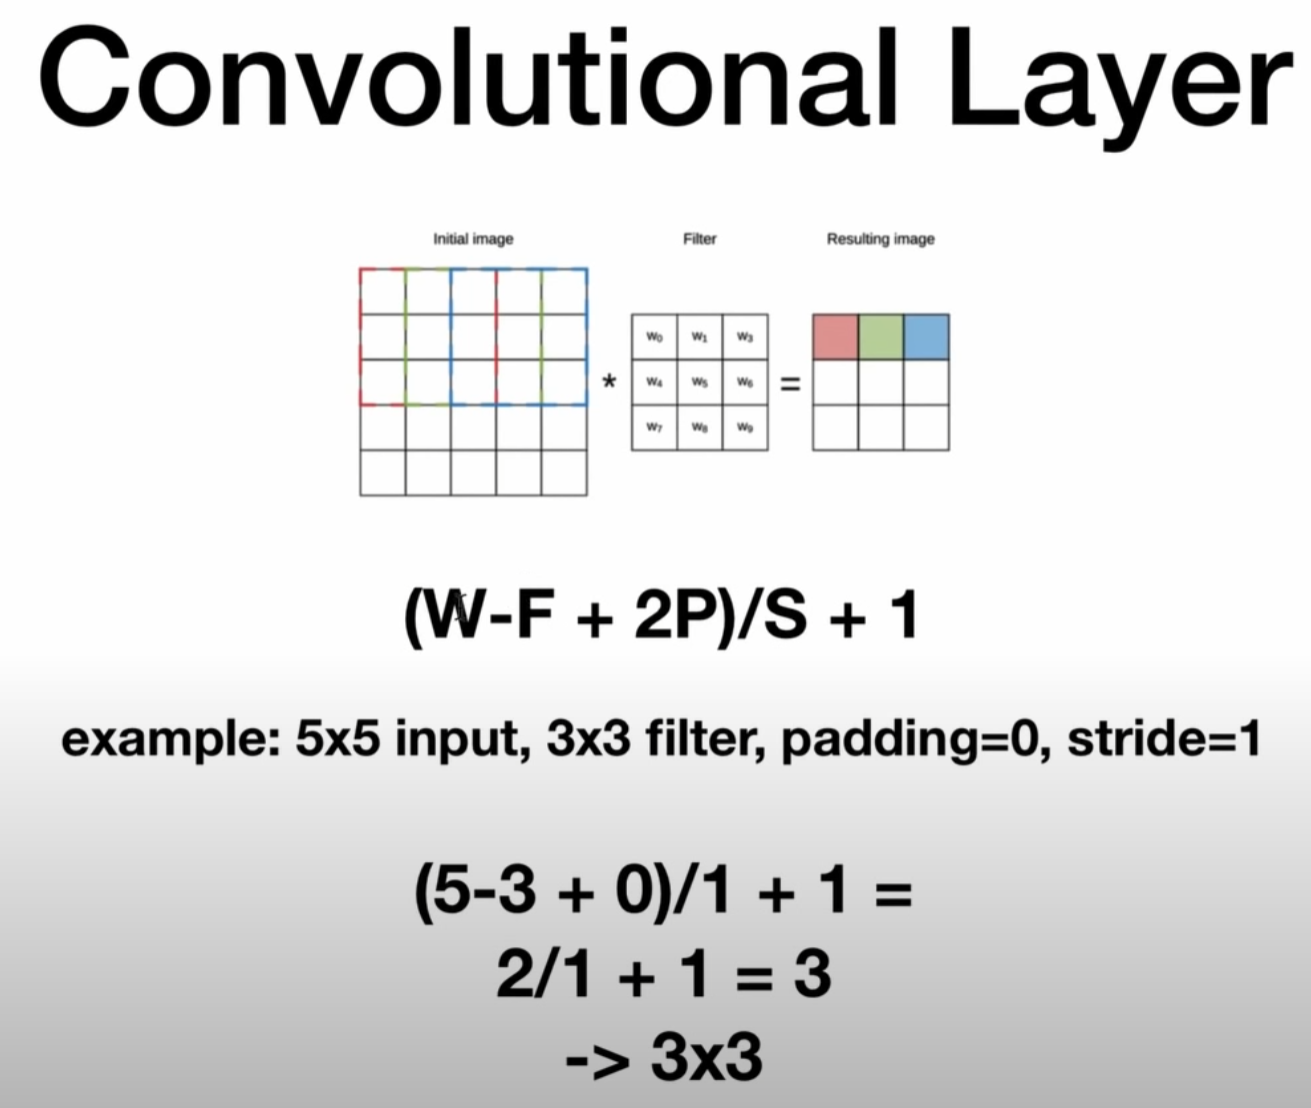

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird','cat','deer','dog','frog','horse','ship','truck')

class ConvolNet(nn.Module):
  def __init__(self):
    super(ConvolNet,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5) #input size is 3, because we have 3 colour channels
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120) #16*5*5 because 
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10) #10 because we have 10 different classes


  
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


model = ConvolNet().to(device)

In [ ]:
critetion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    #forward pass
    output = model(images)
    loss = critetion(output,labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 ==0:
      print(f'Epoch [{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print("res of training:...")

Epoch [1/4], step [2000/12500], Loss: 2.2992
Epoch [1/4], step [4000/12500], Loss: 2.2872
Epoch [1/4], step [6000/12500], Loss: 2.3010
Epoch [1/4], step [8000/12500], Loss: 2.2937
Epoch [1/4], step [10000/12500], Loss: 2.3251
Epoch [1/4], step [12000/12500], Loss: 2.1102
Epoch [2/4], step [2000/12500], Loss: 2.0073
Epoch [2/4], step [4000/12500], Loss: 1.4599
Epoch [2/4], step [6000/12500], Loss: 1.6196
Epoch [2/4], step [8000/12500], Loss: 2.0509
Epoch [2/4], step [10000/12500], Loss: 1.5564
Epoch [2/4], step [12000/12500], Loss: 1.5823
Epoch [3/4], step [2000/12500], Loss: 1.3856
Epoch [3/4], step [4000/12500], Loss: 1.3144
Epoch [3/4], step [6000/12500], Loss: 1.4999
Epoch [3/4], step [8000/12500], Loss: 1.4618
Epoch [3/4], step [10000/12500], Loss: 1.1953
Epoch [3/4], step [12000/12500], Loss: 1.1332
Epoch [4/4], step [2000/12500], Loss: 1.1145
Epoch [4/4], step [4000/12500], Loss: 1.2179
Epoch [4/4], step [6000/12500], Loss: 1.5421
Epoch [4/4], step [8000/12500], Loss: 1.2574
Epoc

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images,labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    #max returns(value, index)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if (label==pred):
        n_class_correct[label]+=1
      n_class_samples[label] +=1
  acc = 100 * n_correct/n_samples
  print(f'accuracy is {acc} %')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f"Accuracy of classes {classes[i]}:{acc}")


accuracy is 46.02 %
Accuracy of classes plane:50.6
Accuracy of classes car:67.3
Accuracy of classes bird:31.6
Accuracy of classes cat:38.4
Accuracy of classes deer:29.6
Accuracy of classes dog:23.2
Accuracy of classes frog:65.1
Accuracy of classes horse:53.9
Accuracy of classes ship:45.2
Accuracy of classes truck:55.3
